<a href="https://colab.research.google.com/github/ranubansal/DSML-Projects/blob/main/Jamboree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!gdown 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 41.6MB/s]


In [ ]:
df= pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**EDA - Exploratory Data Analysis**

Removing serial number because it is not a feature to decide the target value

In [ ]:
df.drop('Serial No.', axis= 1, inplace= True)


In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


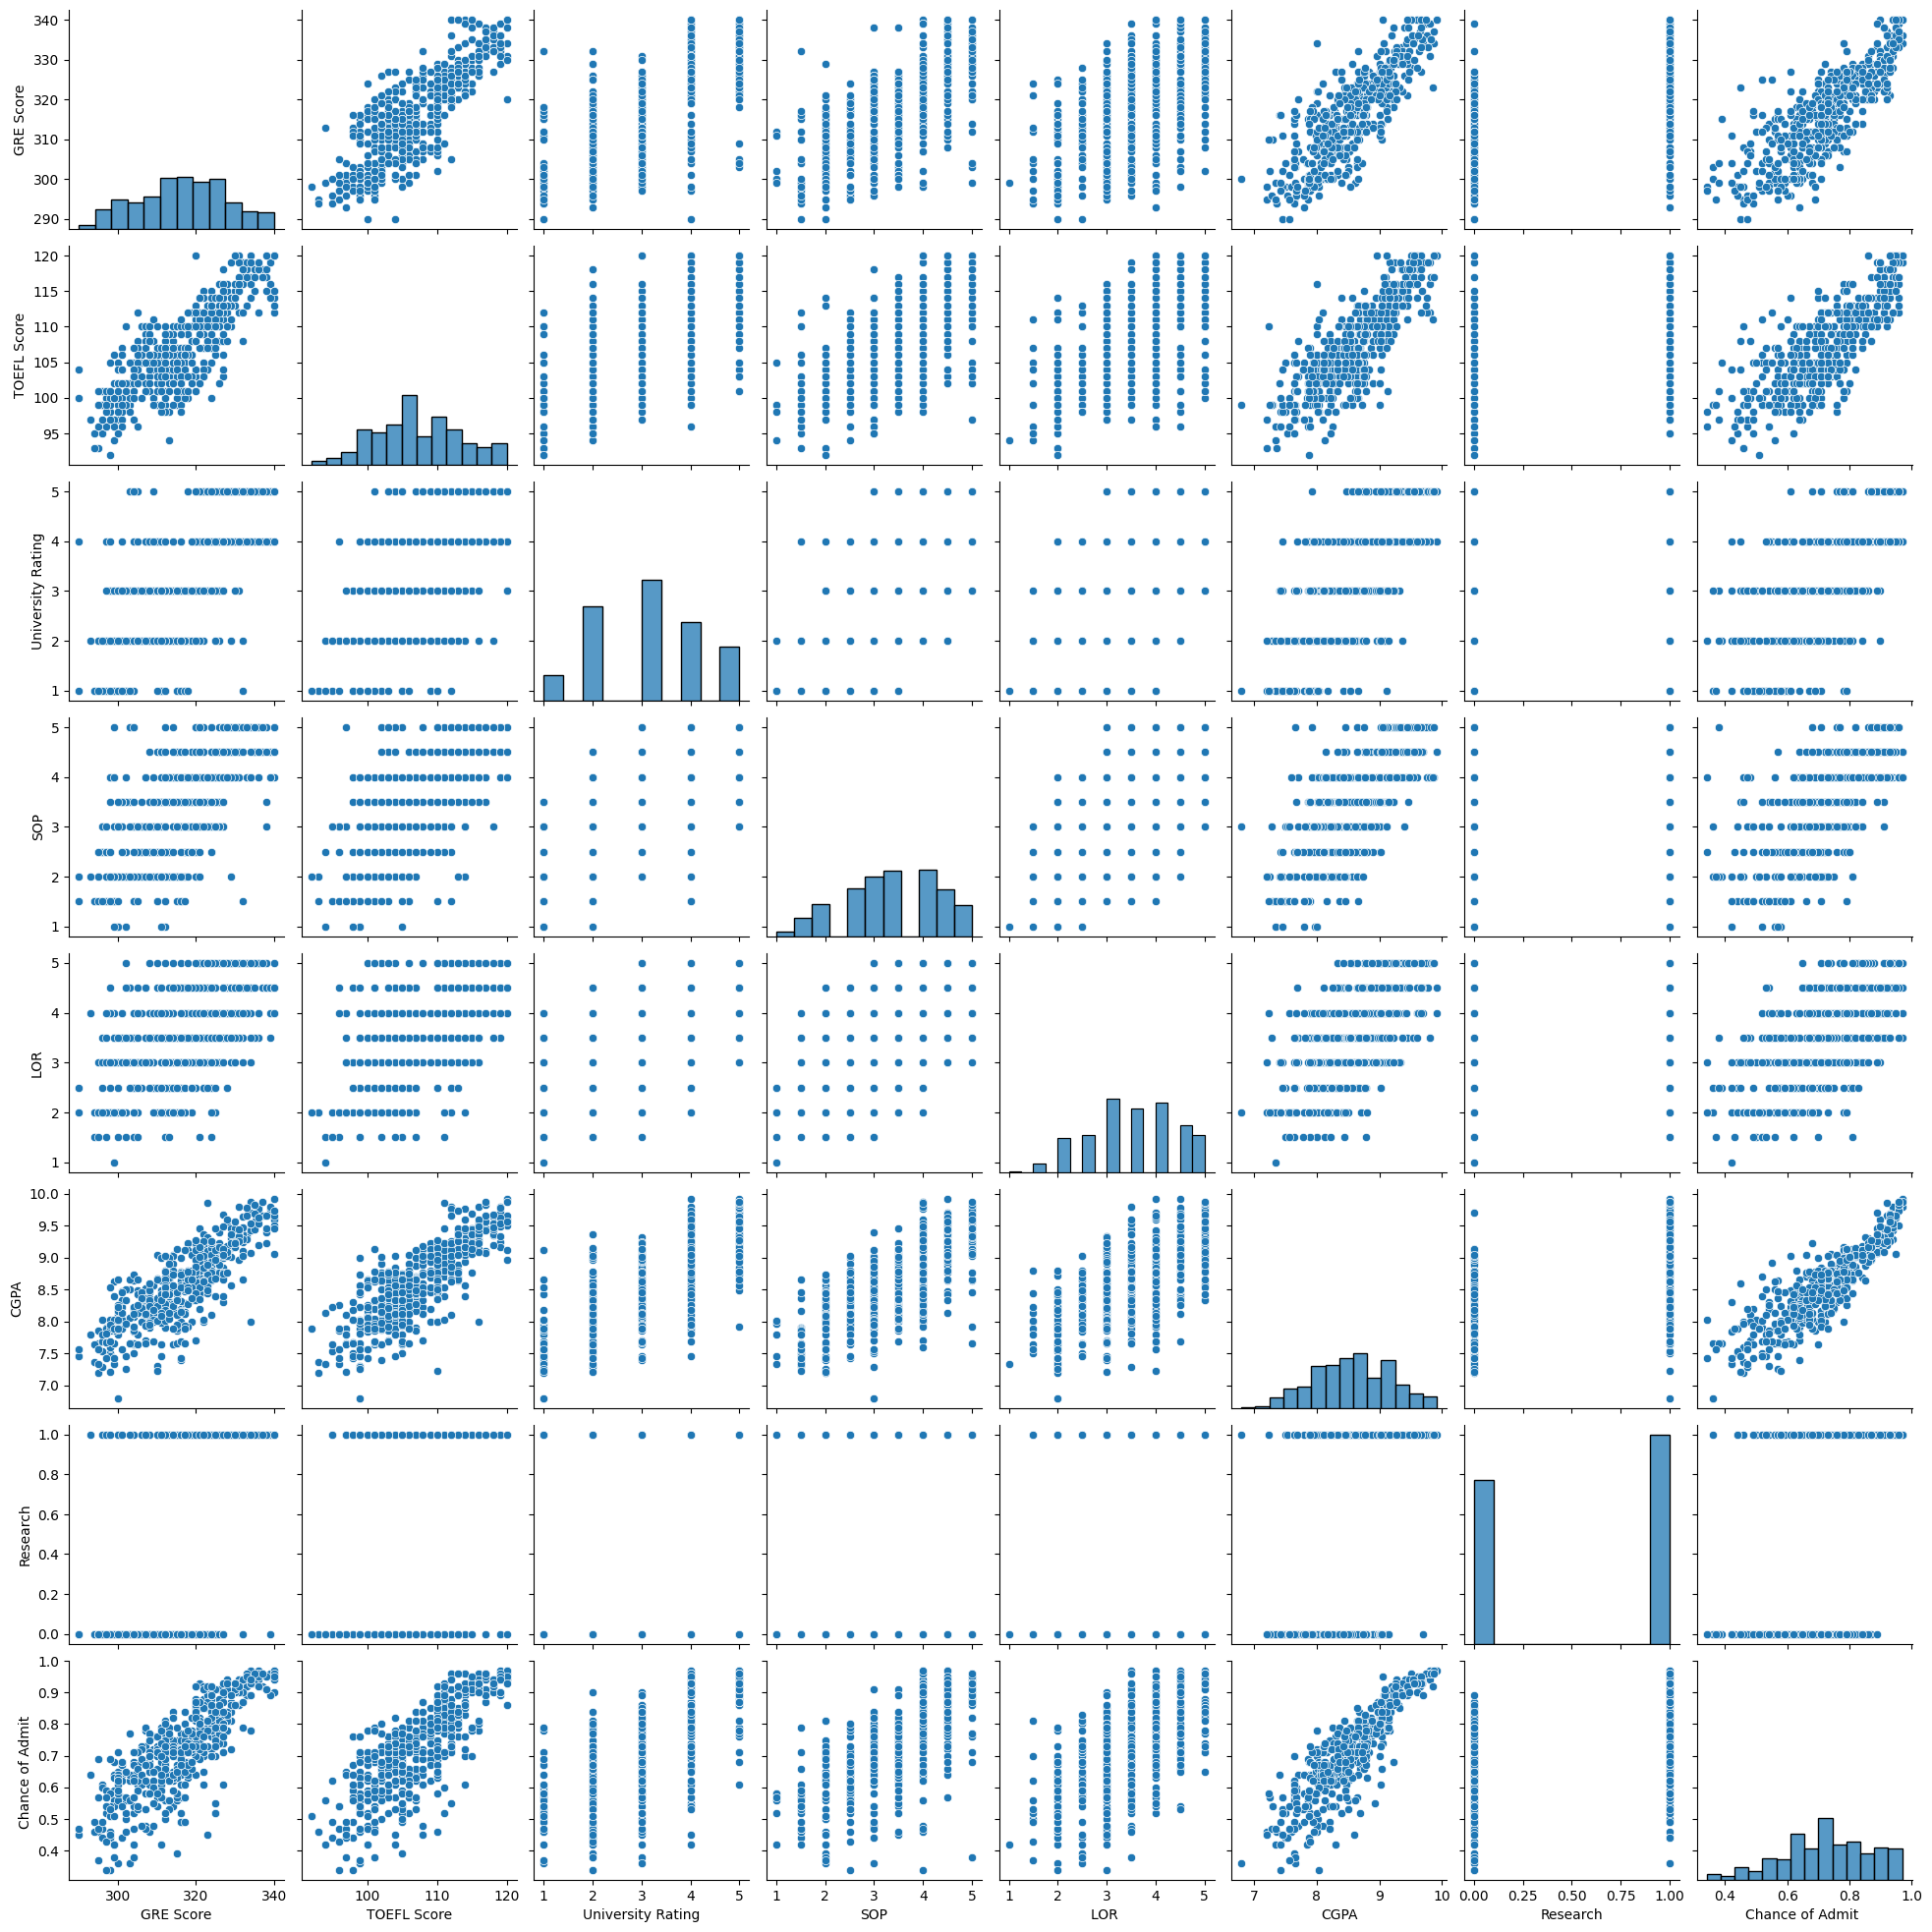

In [ ]:
sns.pairplot(df)
plt.show()

Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)


In [ ]:
df[['University Rating', 'SOP', 'LOR']] = df[['University Rating', 'SOP', 'LOR']].astype('category')
df['Research'] = df['Research'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


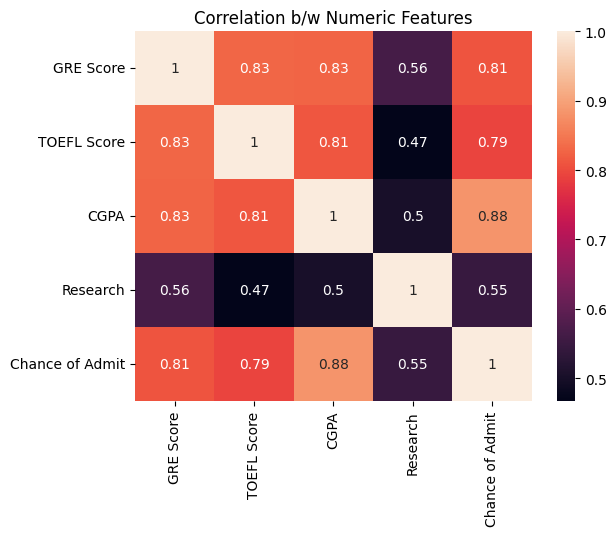

In [ ]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.title('Correlation b/w Numeric Features')
plt.show()

Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit
Infact, they are also highly correlated amongst themselves

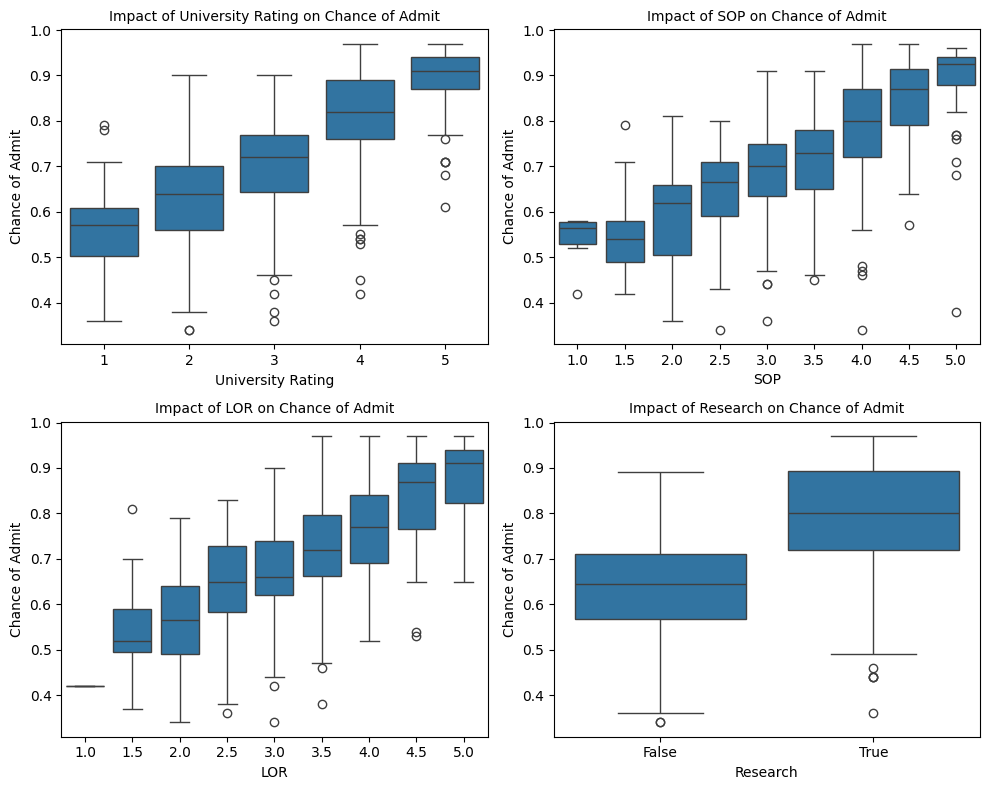

In [ ]:
cat_cols= ['University Rating', 'SOP', 'LOR', 'Research']
plt.figure(figsize=(10,8))
i=1
for col in cat_cols:
  plt.subplot(2,2,i)
  sns.boxplot(data=df, x=col, y= 'Chance of Admit')
  plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')
  i+=1
plt.tight_layout()
plt.show()


As seen in the pairplot earlier, the categorical variables such as university ranking, research, quality of SOP and LOR also increase the chances of admit.

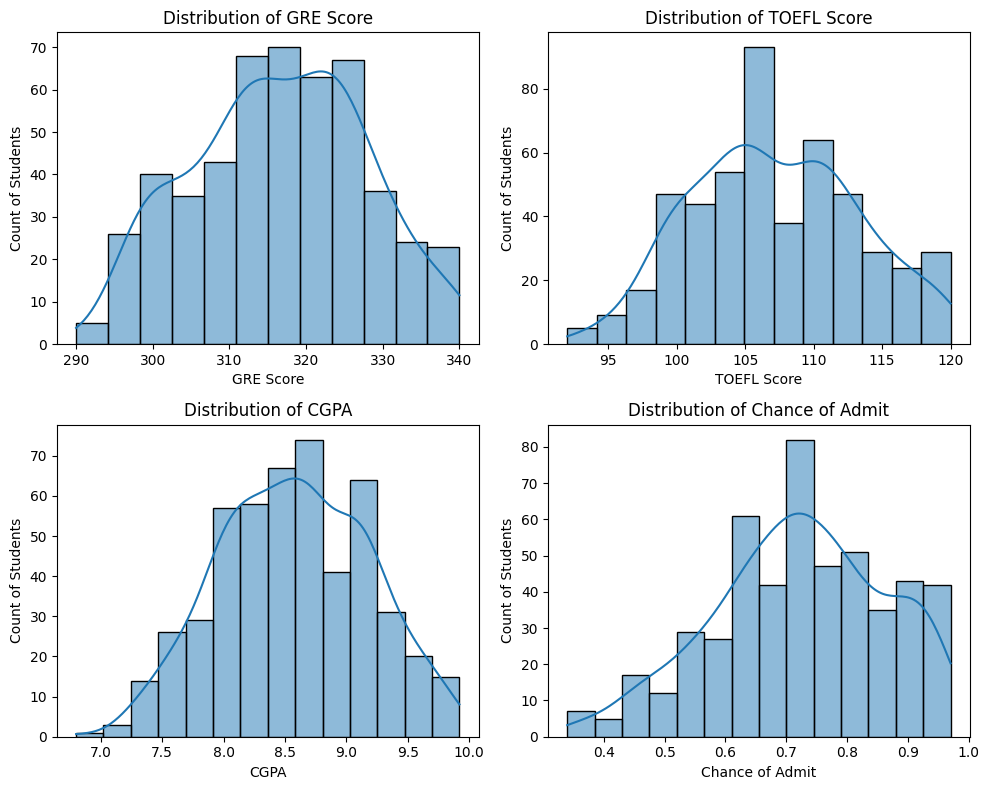

In [ ]:
# Distribution of continuous numerical features
numeric_cols = df.select_dtypes(include=['float','int']).columns.tolist()

plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.tight_layout()
plt.show()

We can see the range of all the numerical attributes:

-GRE scores are between 290 and 340, with maximum students scoring in the range 310-330
-TOEFL scores are between 90 and 120, with maximum students scoring around 105
-CGPA ranges between 7 and 10, with maximum students scoring around 8.5
-Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

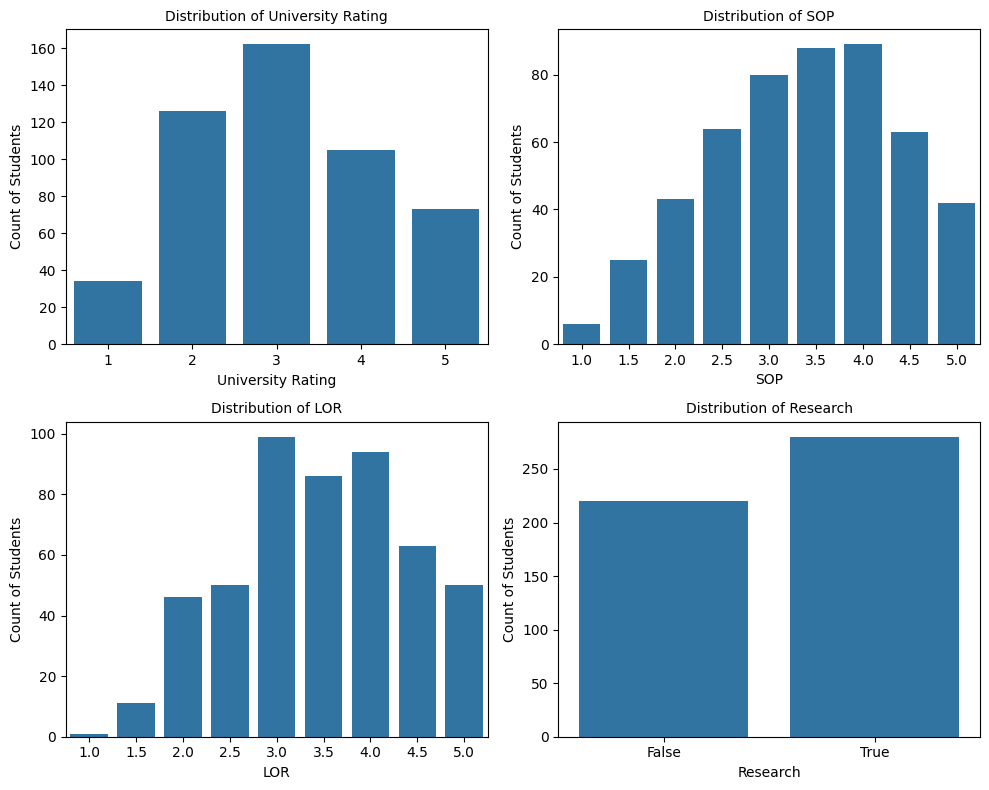

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show();

It can be observed that the most frequent value of categorical features is as following:

-University Rating: 3
-SOP: 3.5 & 4
-LOR: 3
-Research: True

**Data Preprocessing**
**Missing Values/Outliers/Duplicates Check**


In [ ]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No missing value in the data set

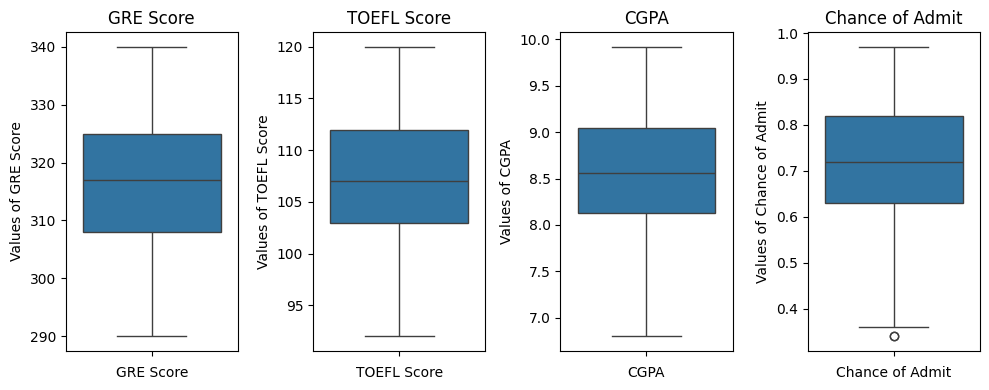

In [ ]:
# Check for outliers in numerical columns
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

It can be observed that there are no outliers in the numeric columns (all the observations are within the whiskers which represent the mimimum and maximum of the range of values)

In [ ]:
# Check for Duplicate rows
df[df.duplicated()].shape

(0, 8)

No duplicate row in the dataset

# **Train-Test Split**


In [ ]:
numeric_cols.remove('Chance of Admit')

In [ ]:
# Separate feature and target variables
x = df[numeric_cols + cat_cols]
y = df[['Chance of Admit']]

In [ ]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,True
1,324,107,8.87,4,4.0,4.5,True
2,316,104,8.00,3,3.0,3.5,True
3,322,110,8.67,3,3.5,2.5,True
4,314,103,8.21,2,2.0,3.0,False


In [ ]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [ ]:
# Split the data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400, 1)
Shape of y_test: (100, 1)


# **Label Encoding & Standardisation**

In [ ]:
# Initialize a dictionary to store the label encoders
label_encoders = {}

# Loop through each categorical column and initialize the label encoder
for col in cat_cols:
    label_encoders[col] = LabelEncoder()

In [ ]:
# Fitting encoders to the respective columns
for col in cat_cols:
  label_encoders[col].fit(x[col])

In [ ]:
#Transforming categorical columns in the train and test data
for col in cat_cols:
  x_train[col] = label_encoders[col].transform(x_train[col])
  x_test[col] = label_encoders[col].transform(x_test[col])

In [ ]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1
56,316,102,7.40,2,2,4,0
301,319,108,8.76,1,3,4,0
229,324,111,9.01,3,4,4,1
331,311,105,8.12,1,4,2,1
132,309,105,8.56,4,5,5,0


In [ ]:
#Initialising object of class MinMaxScaler() for Standardisation
scaler_x = MinMaxScaler()

In [ ]:
#Fitting scaler_x to the training data
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [ ]:
all_cols = x_train.columns

In [ ]:
#Transforming numeric columns of x_train and x_test
x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


# **Base Model: Linear Regression**

In [ ]:
#Initialising object of Class LinearRegression()
model_lr = LinearRegression()

In [ ]:
# Fitting the model to the training data
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting values for the training and test data
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

In [ ]:
# Evaluating the model using multiple loss functions
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [ ]:
# Metrics for training data
model_evaluation(y_train.values, y_pred_train, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [ ]:
#Metrics for test data
model_evaluation(y_test.values, y_pred_test, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

-Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
-Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
-R2 Score of 0.82 means that our model captures 82% variance in the data
-Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction-

In [ ]:
(model_lr.coef_)

array([[0.12172192, 0.08388445, 0.3510845 , 0.01027519, 0.00725476,
        0.06895193, 0.02402679]])

In [ ]:
# Model Coefficients

for feature,weight in zip(x_train.columns, model_lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of CGPA: 0.35
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of Research: 0.02


In [ ]:
model_lr.intercept_

array([0.34696506])

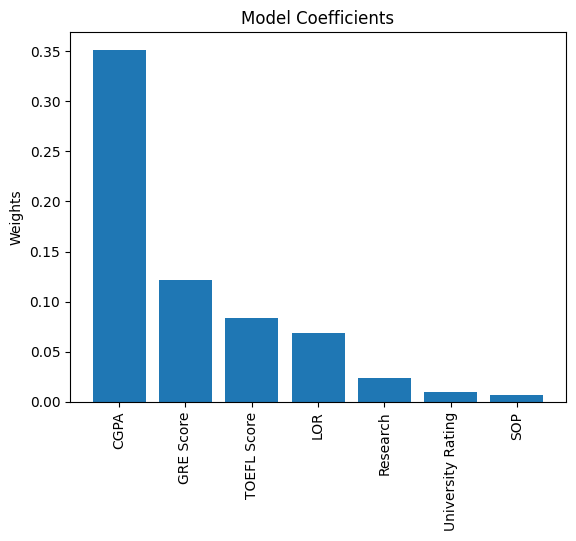

In [ ]:
model_weights=list(zip(x_train.columns, model_lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

CGPA & GRE scores have the highest weight
SOP, University rating, and research have the lowest weights

# **Testing Assumptions of Linear Regression Model**

**Multicolinearity Check**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,31.185925
1,TOEFL Score,26.753950
2,CGPA,41.732265
3,University Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


We see that almost all the variables (excluding research) have a very high level of colinearity. This was also observed from the correlation heatmap which showed strong positive correlation between GRE score, TOEFL score and CGPA.

**Mean of Residuals**

In [ ]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.005453623717661285


Since the mean of residuals is very close to 0, we can say that the model is unbiased

# **Linearity of Variables**

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

-Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
-U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
-Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.

If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

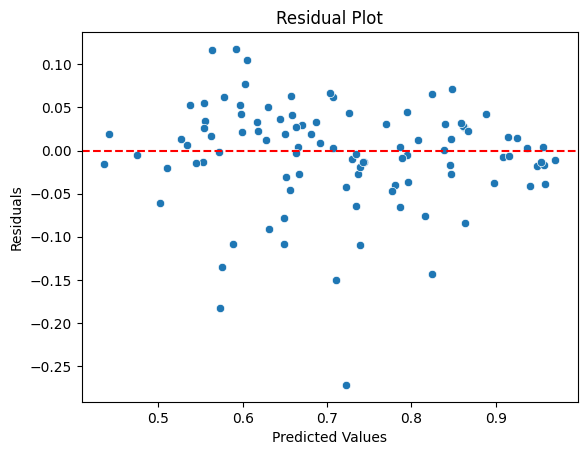

In [ ]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists



# **Homoscedasticity**

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

-Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

-Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

-Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

-Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

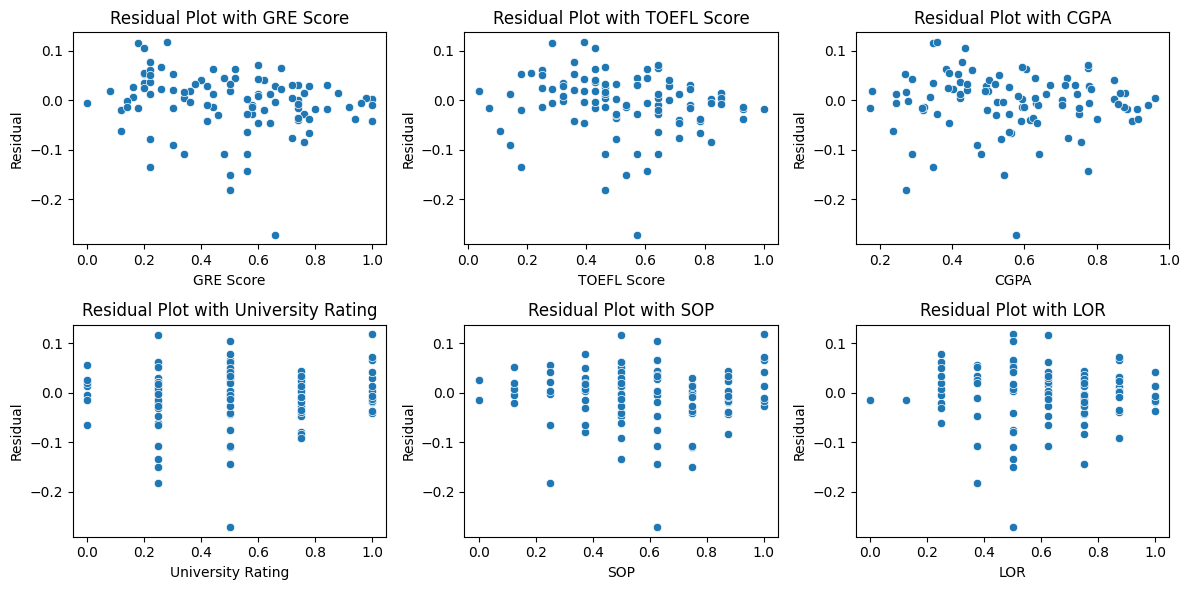

In [ ]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

# **Normality of Residuals**

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

-Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

-Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

-Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.

-Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

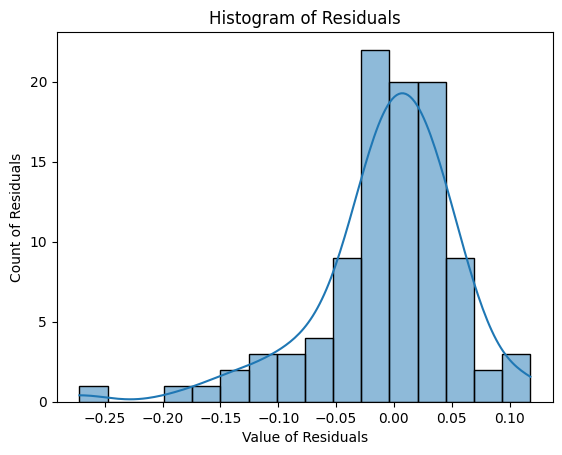

In [ ]:
#Histogram of Residuals
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution

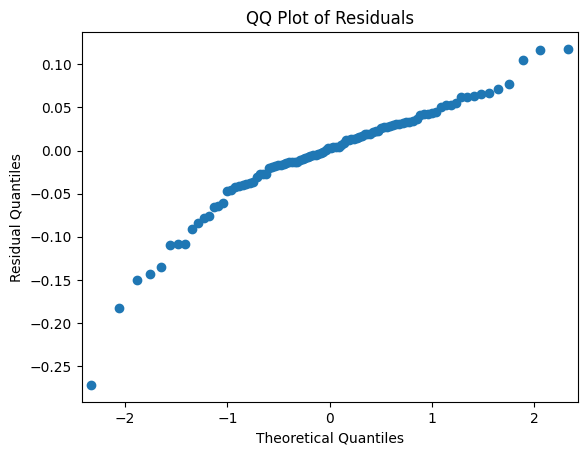

In [ ]:
# QQ-Plot of residuals
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show()

The QQ plot shows that residuals are slightly deviating from the straight diagonal.

# **Lasso and Ridge Regression**
Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

Ridge Regression:
Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

Lasso Regression:
Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

The main differences between Ridge and Lasso regression are:

Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [ ]:
# Initialising instance of Ridge and Lasso classes
model_ridge = Ridge()
model_lasso = Lasso()

In [ ]:
# Fitting the models to training data
model_ridge.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)

Lasso()

In [ ]:
# Predicting values for train and test data

y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

In [ ]:
# Evaluating Model Performance
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

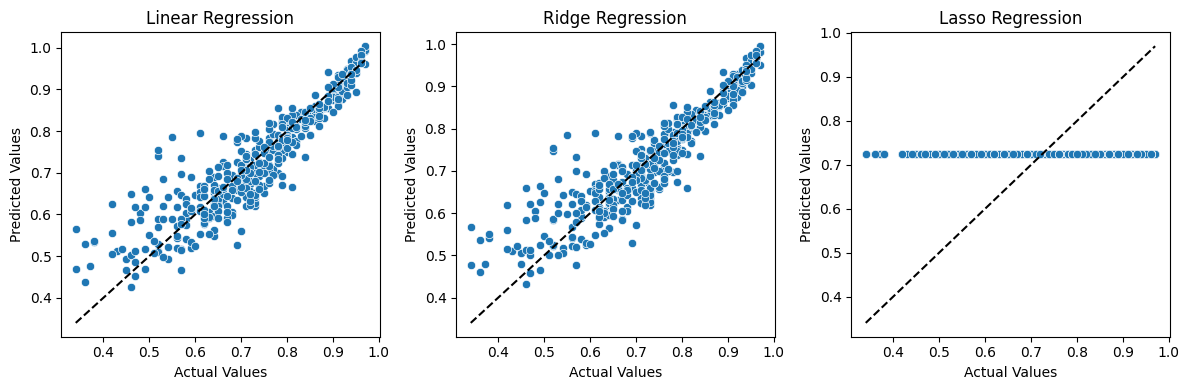

In [ ]:
# Actual v/s Predicted values for training data

actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1

plt.tight_layout()
plt.show();

We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

# **Insights & Recommendations**

**Insights:**

The distribution of target variable (chances of admit) is left-skewed
Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves
the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.
From the model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant
Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.
Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

**Recommendations:**

Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.
Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables